In [1]:
cd ..

/Users/deligny/Documents/my/code/neural_network_project


In [2]:
import neural_network.layers
import neural_network.activations
from neural_network.layers import LayerDense
from neural_network.loss import LossMSE, LossCrossEntropy
from neural_network.activations import ActivationReLU, ActivationSigmoid, ActivationLeakyReLU
from neural_network.optimizers import AdamOptimizer
from neural_network.network import NeuralNetwork

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importlib.reload(neural_network.layers)
importlib.reload(neural_network.activations)

<module 'neural_network.activations' from '/Users/deligny/Documents/my/code/neural_network_project/neural_network/activations.py'>

In [6]:
data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


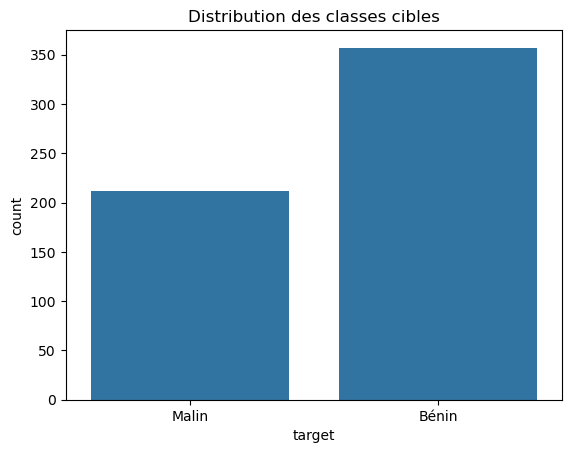

In [9]:
sns.countplot(x='target', data=df)
plt.title('Distribution des classes cibles')
plt.xticks([0, 1], ['Malin', 'Bénin'])
plt.show()

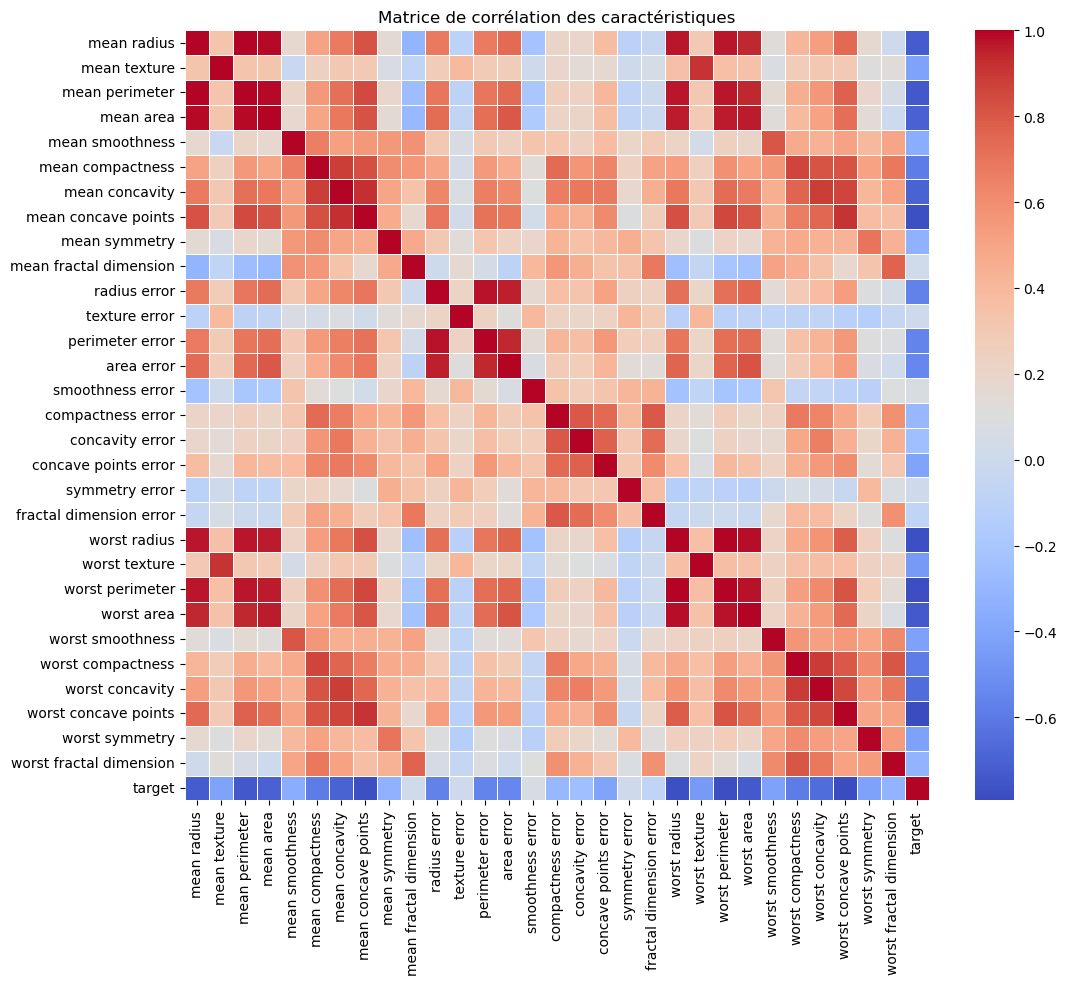

In [10]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation des caractéristiques')
plt.show()

In [12]:
df.columns.__len__()

31

In [4]:
data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dataset = list(zip(X_train, y_train))

In [ ]:
optimizer = AdamOptimizer(learning_rate=0.01)

network = NeuralNetwork([
    LayerDense(X_train.shape[1], 64, activation=ActivationReLU(), layer_norm=True, dropout_rate=0.05),
    LayerDense(64, 32, activation=ActivationReLU(), layer_norm=True, dropout_rate=0.05),
    LayerDense(32, 1, activation=ActivationSigmoid())
], loss_function=LossCrossEntropy())

epochs = 5000
network.train(dataset, epochs=epochs, optimizer=optimizer)


correct = 0
for inputs, expected in zip(X_test, y_test):
    predicted = network.forward(inputs)
    predicted = (predicted > 0.5).astype(int)
    
    if predicted.shape != expected.shape:
        predicted = predicted.flatten()
    
    correct += int(predicted[0] == expected[0])
accuracy = correct / len(y_test)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")

Epoch 0, Loss: 0.035075
Epoch 100, Loss: 0.017083
Epoch 200, Loss: 0.021359
Epoch 300, Loss: 0.032128
Epoch 400, Loss: 0.009966
Epoch 500, Loss: 0.035786
Epoch 600, Loss: 0.017082
Epoch 700, Loss: 0.017080
Epoch 800, Loss: 0.030705
Epoch 900, Loss: 0.015657
Epoch 1000, Loss: 0.021350
Epoch 1100, Loss: 0.024196
Epoch 1200, Loss: 0.018503
Epoch 1300, Loss: 0.025620
Epoch 1400, Loss: 0.021350
Epoch 1500, Loss: 0.015657
Epoch 1600, Loss: 0.022163
Epoch 1700, Loss: 0.021350
Epoch 1800, Loss: 0.022773
Epoch 1900, Loss: 0.019926
Epoch 2000, Loss: 0.018503
Epoch 2100, Loss: 0.019926
Epoch 2200, Loss: 0.017080
Epoch 2300, Loss: 0.021350
Epoch 2400, Loss: 0.022773
Epoch 2500, Loss: 0.015656
Epoch 2600, Loss: 0.025619
Epoch 2700, Loss: 0.027043
Epoch 2800, Loss: 0.011386
Epoch 2900, Loss: 0.022773
Epoch 3000, Loss: 0.023586
Epoch 3100, Loss: 0.015656
Epoch 3200, Loss: 0.022773
Epoch 3300, Loss: 0.014233
Epoch 3400, Loss: 0.025621
Epoch 3500, Loss: 0.029889
Epoch 3600, Loss: 0.005693
Epoch 3700, L

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# ✅ Load and preprocess the data
data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.05),

    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.05),

    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])

start_time = time.time()
history = model.fit(X_train, y_train, epochs=5000, batch_size=32, verbose=0, validation_data=(X_test, y_test))
train_time = time.time() - start_time

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ TensorFlow Accuracy: {test_accuracy * 100:.2f}%")
print(f"⏳ Training Time: {train_time:.2f} seconds")

✅ TensorFlow Accuracy: 97.37%
⏳ Training Time: 183.00 seconds
